                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-01-03  115.800003  116.330002  114.760002  116.150002  113.847588   
2017-01-04  115.849998  116.510002  115.750000  116.019997  113.720169   
2017-01-05  115.919998  116.860001  115.809998  116.610001  114.298470   
2017-01-06  116.779999  118.160004  116.470001  117.910004  115.572701   
2017-01-09  117.949997  119.430000  117.940002  118.989998  116.631287   

              Volume  100movingavg  
Date                                
2017-01-03  28781900    113.847588  
2017-01-04  21118100    113.783878  
2017-01-05  22193600    113.955409  
2017-01-06  31751900    114.359732  
2017-01-09  33561900    114.814043  
Basic plot for Adj. Close


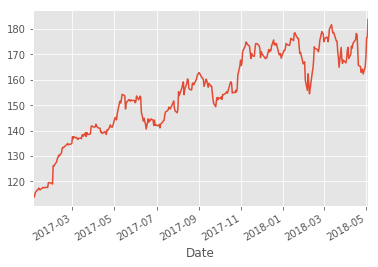

Plot for Adj. Close, 100 day moving average and volume


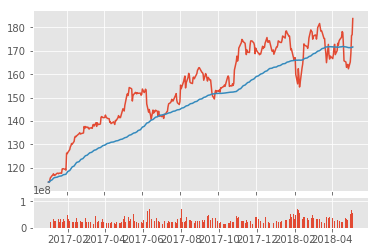

Candlestick plot


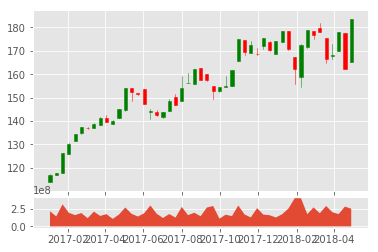

In [55]:
#git clone https://github.com/pydata/pandas-datareader.git
#python setup.py install
#import pandas_datareader as pdr
#pdr.get_data_yahoo('AAPL', start, end)

import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import pandas_datareader.data as web

style.use('ggplot')

start = datetime.datetime(2017, 1, 1)
end = datetime.date.today()

# Read stock historical dataset  
df = web.DataReader("AAPL", 'yahoo', start, end)
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)

#drop particular column from the dataset; df = df.drop("Symbol", axis=1)
#Export data to CSV file; df.to_csv('AAPL.csv')
#Read data to CSV file; df1 = pd.read_csv("AAPL.csv", parse_dates=True, index_col=0)

#A simple moving average is the average price in a window of time 
#The Adj Close price is the closing price on any given day amended to include any distributions and corporate actions that occurred at any time before the next day's open.
df['100movingavg'] = df['Adj Close'].rolling(window=100, min_periods = 0).mean()

print(df.head())

#Create simple plots
#df.plot()
df['Adj Close'].plot() # df[['High','Low']].plot()
print("Basic plot for Adj. Close")
plt.show()

#Create two subplots of 6x1 grid ; The first subplot starts at (0,0) spans 5 rows, and spans 1 column and the next plot starts at (5,0), spans 1 row, and 1 column. 
#The 2nd axis also has the sharex=ax1, which means that ax2 will always align its x axis with whatever ax1's is, and visa-versa.
axis1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
axis2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)

#Graph the Adj close and the 100movingavg on the axis 1, and the volume on the axis 2
axis1.plot(df.index, df['Adj Close'])
axis1.plot(df.index, df['100movingavg'])
axis2.bar(df.index, df['Volume'])

print("Plot for Adj. Close, 100 day moving average and volume")
plt.show()

# OHLC chart/ candlestick chart = condenses the open, high, low, and close data all in one chart
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

# the stock data used is daily data, and resampling to 10day data shrinks the size of data significantly
df_ohlc = df['Adj Close'].resample('10D').ohlc()

# resample volume data to align with Adj.Close data 
df_volume = df['Volume'].resample('10D').sum()

df_ohlc = df_ohlc.reset_index()
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

fig = plt.figure()
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)
ax1.xaxis_date()

# candlestick plot with two axis
print("Candlestick plot")
candlestick_ohlc(ax1, df_ohlc.values, width=5, colorup='g', colordown='r')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()
